# Frequency Strain Changes

I am analyzing the amplitude over time of the noise signal from specific frequencies; essentially, I will separate a gravitational wave detector into many slices, perform a fourier transform, then get the PSD at a specific frequency. I will do this over time for several minutes of data, then analyze the result.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from gwpy.timeseries import TimeSeries

# Getting data
min_time = 1263097420
max_time = 1263098020
hdata = hdata = TimeSeries.fetch_open_data('H1', min_time, max_time)

## The spectrogram

Here, I've taken ten minutes of data from LIGO H1. Looking at the spectrogram, there are some key features. There are bands running across the entire spectrogram consistently that are very visible at near 500 Hz, 1000 Hz, and between 1000 and 2000 Hz. I'm not yet sure what the reason for these are. There also seems to be a band across the spectrogram at 300 Hz which does not run consistently; it may be an example of time-varying noise with some periodicity. Additionally, looking at the lower frequencies, there appear to be vertical bands that run from the lowest frequencies up to about 200 Hz.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


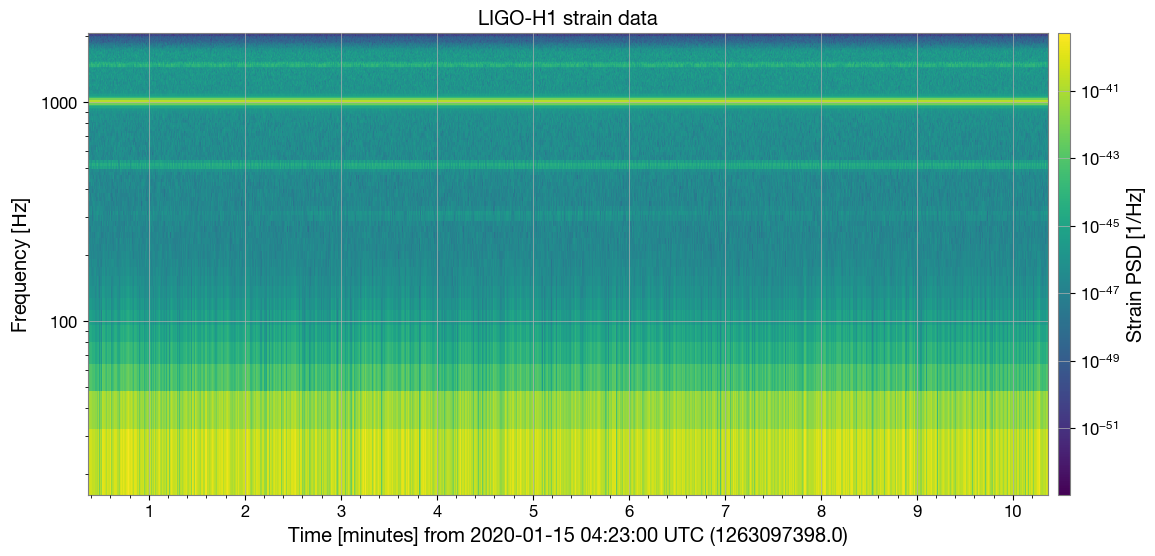

In [ ]:
spectrogram = hdata.spectrogram2(fftlength=1/16., overlap=15/256.)
plot = spectrogram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('LIGO-H1 strain data')
ax.colorbar(label=r'Strain PSD [1/Hz]')
plot.show()

In [51]:
# A function for making a frequency-specific strain time series
# When chosing a frequency, keep in mind the trade-off between frequency resolution and time resolution
# The available frequencies will be multiples of the 1/fftlength; however, they may not be proper
# integer multiples; chose an even power of two in order to get integer frequencies.
def freq_specific_time_series(data, start_time, analysis_length, dt, max_time, freq, fftlength=1/16.):
    lower = start_time
    upper = lower + analysis_length
    values = []
    while (upper <= max_time):
        slice = data.crop(lower, upper)
        psd = slice.psd(fftlength=fftlength)
        values += [psd.value_at(freq).value]
        lower += dt
        upper += dt
    return TimeSeries(values, None, start_time + analysis_length / 2, dt)

## Changing the analysis step length

When the step length of analyses is changed, similar features are captured, but a smaller step length is able to do it with much more fine detail. However, not all of this detail may be relevant or useful. A step length that allows for 50% overlap seems to be reasonable in order to catch different features well. However, with very large PSD analysis lengths, this can result in not much detail; in these cases it may make sense to use a smaller step size.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


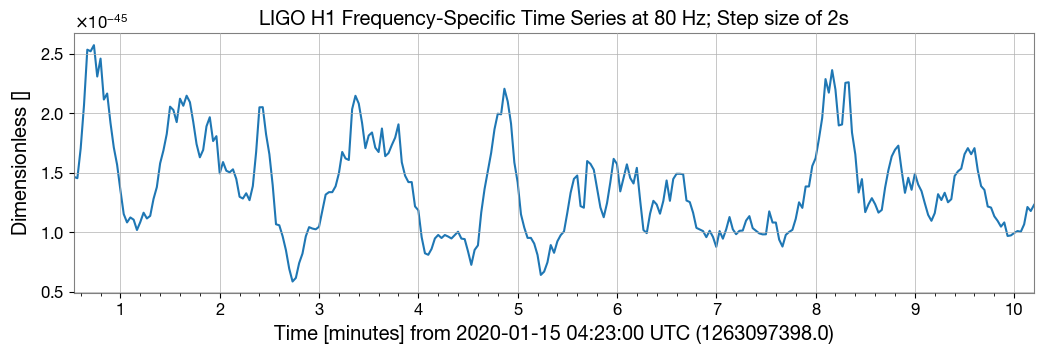

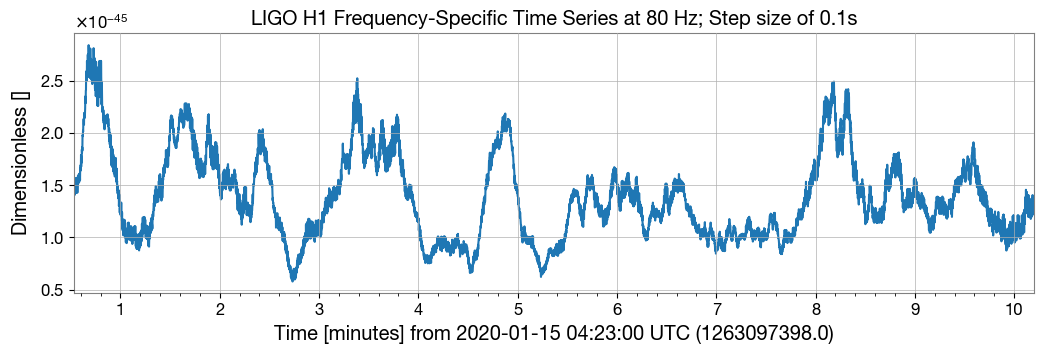

In [26]:
# Showing plots with different dt
fss = freq_specific_time_series(hdata, min_time, 20, 2, max_time, 80)
plot1 = fss.plot()
ax1 = plot1.gca()
ax1.set_title('LIGO H1 Frequency-Specific Time Series at 80 Hz; Step size of 2s')
plot1.show()

fss = freq_specific_time_series(hdata, min_time, 20, 0.1, max_time, 80)
plot2 = fss.plot()
ax2 = plot2.gca()
ax2.set_title('LIGO H1 Frequency-Specific Time Series at 80 Hz; Step size of 0.1s')
plot2.show()

# Changing the dt reveals similar plots, but very small dt might be too fine for good analysis.
# Also it takes forever

## Changing the PSD analysis length

Changing the analysis length, or the length that is used to create a PSD from the data, results in more differences than is the case with changing the step size. Larger analysis lengths are not as influenced by more sudden changes since larger times are lumped into the same datapoint for the frequency-specific time series, whereas smaller analysis lengths are more influenced and thus appear more erratic.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


'\nChanging the analysis length can significantly change the features of the plot. Although key parts of it are similar,\nsuch as peaks at the same spot, decreasing the analysis length for the psd generation seems to make the FSS much more\nerratic.\n\nKEY QUESTION: How can we identify a good dt and analysis time to use?\n'

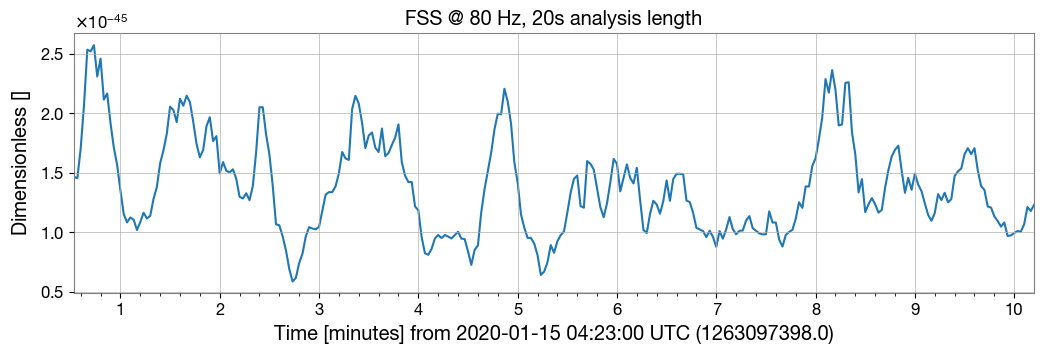

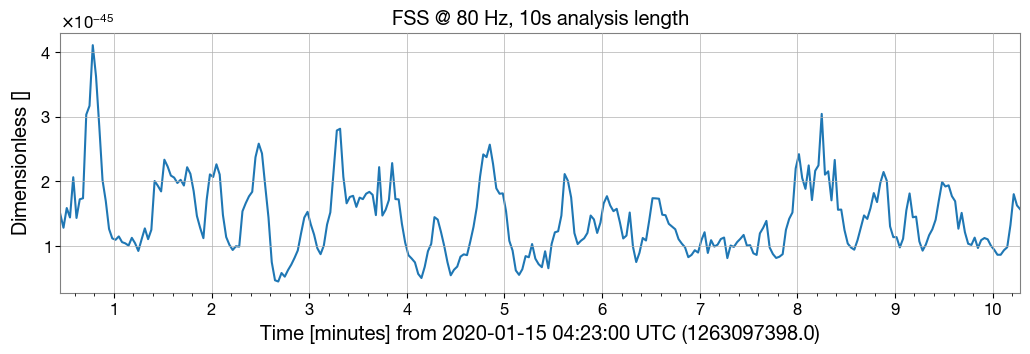

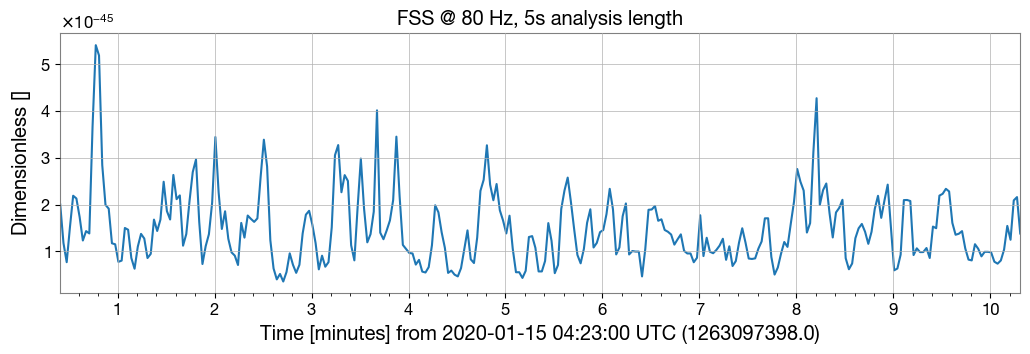

In [28]:
# Showing plots with different analysis lengths
fss = freq_specific_time_series(hdata, min_time, 20, 2, max_time, 80)
plot = fss.plot()
ax = plot.gca()
ax.set_title('FSS @ 80 Hz, 20s analysis length')
plot.show()

fss = freq_specific_time_series(hdata, min_time, 10, 2, max_time, 80)
plot = fss.plot()
ax = plot.gca()
ax.set_title('FSS @ 80 Hz, 10s analysis length')
plot.show()

fss = freq_specific_time_series(hdata, min_time, 5, 2, max_time, 80)
plot = fss.plot()
ax = plot.gca()
ax.set_title('FSS @ 80 Hz, 5s analysis length')
plot.show()

'''
Changing the analysis length can significantly change the features of the plot. Although key parts of it are similar,
such as peaks at the same spot, decreasing the analysis length for the psd generation seems to make the FSS much more
erratic.

KEY QUESTION: How can we identify a good dt and analysis time to use?
'''

## FSS PSDs with different analysis lengths

The following three PSDs are created with different initial PSD analysis lengths which create different FSSs; these are then run through another PSD to identify how the intensity of a given frequency in the original data varies over time. These graphs show that there is some periodicity.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


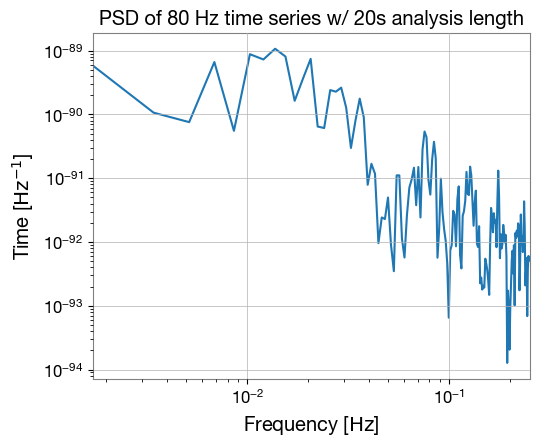

In [29]:
# PSD of FSS with 20 second intervals
fss = freq_specific_time_series(hdata, min_time, 20, 2, max_time, 80)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz time series w/ 20s analysis length')
plot.show()

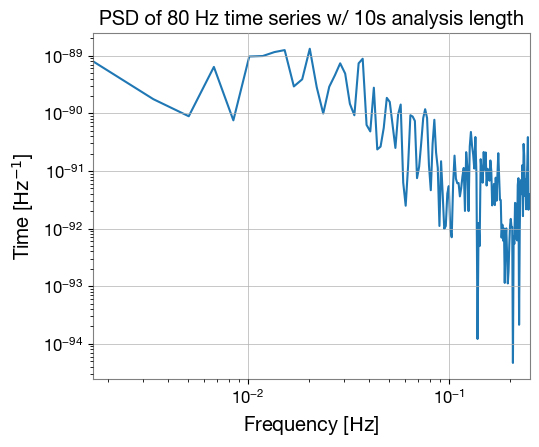

In [30]:
# PSD of FSS with 10 second intervals
fss = freq_specific_time_series(hdata, min_time, 10, 2, max_time, 80)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz time series w/ 10s analysis length')
plot.show()

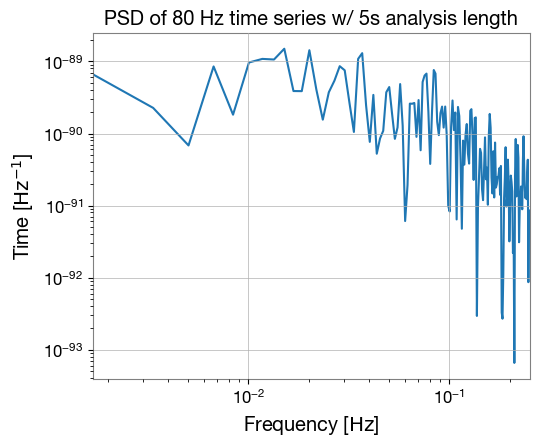

In [32]:
# PSD of FSS with 5 second intervals
fss = freq_specific_time_series(hdata, min_time, 5, 2, max_time, 80)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz time series w/ 5s analysis length')
plot.show()

## Analyzing different frequencies

The following graphs do the same thing but are analyzing different frequencies. They show some general similarities but also some key differences. While the differences might not look so significant on the plot, due to the log nature of the y-axis, these variations are on the order of multiple powers of ten. Part of this may be artifacts from the analysis, or from other frequencies bleeding into the analysis due to the limitations of frequency resolution. However, this is a key difference from white noise, which would be expected to have a flatter curve on the PSD.

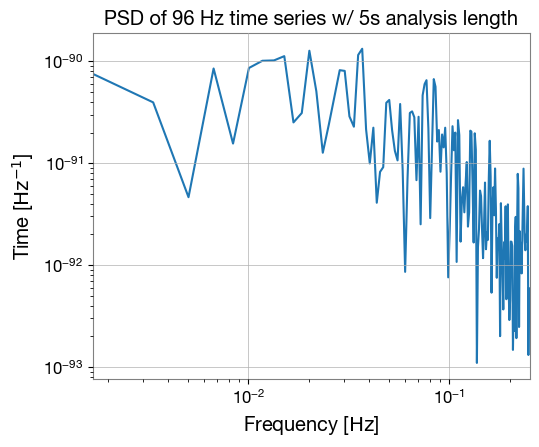

In [34]:
# # Trying new frequencies
# # PSD of FSS with 5 second intervals
fss = freq_specific_time_series(hdata, min_time, 5, 2, max_time, 96)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 96 Hz time series w/ 5s analysis length')
plot.show()

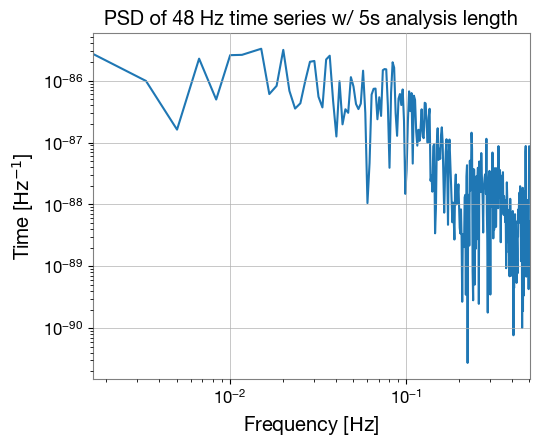

In [35]:
fss = freq_specific_time_series(hdata, min_time, 5, 1, max_time, 48)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 48 Hz time series w/ 5s analysis length')
plot.show()

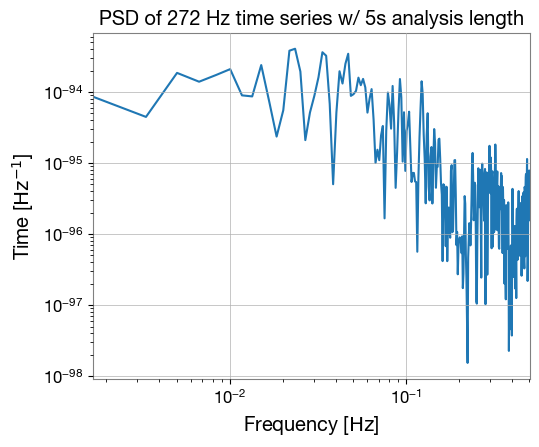

In [36]:
fss = freq_specific_time_series(hdata, min_time, 5, 1, max_time, 272)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 272 Hz time series w/ 5s analysis length')
plot.show()

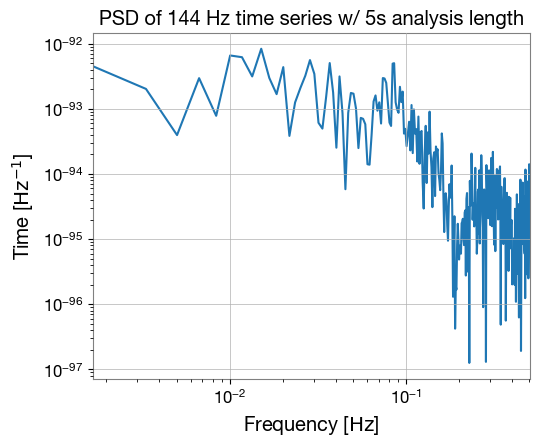

In [37]:
fss = freq_specific_time_series(hdata, min_time, 5, 1, max_time, 144)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 144 Hz time series w/ 5s analysis length')
plot.show()

## Changing `fftlength`

There is a fundamental tradeoff in PSDs between frequency and time resolution. Does changing the `fftlength` parameter for analysis alter the findings of a FSSPSD? Currently not sure, better ask Dr. Shawhan! Interesting: notice the different y-axis lengths, especially for the `fftlength = 1/16.`.

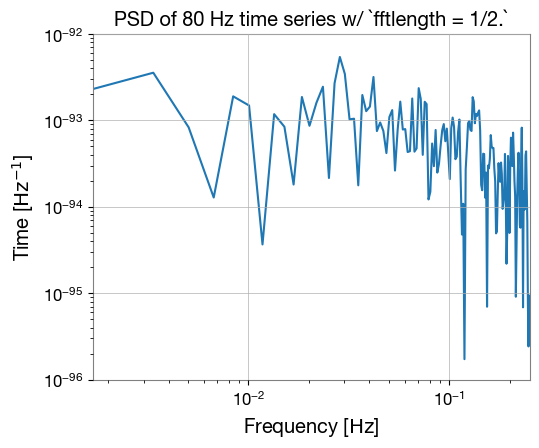

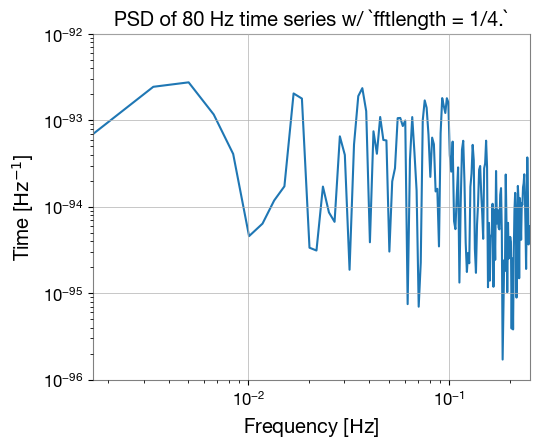

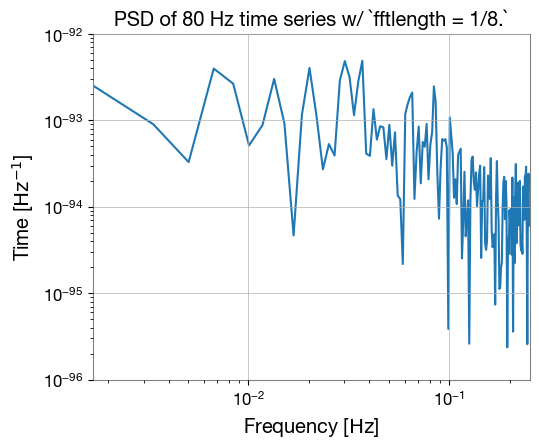

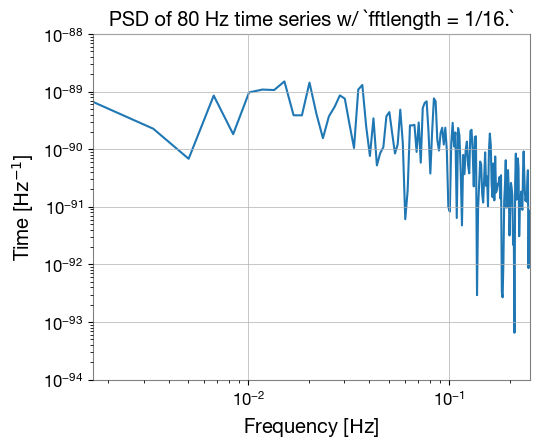

In [48]:
fss = freq_specific_time_series(hdata, min_time, 5, 2, max_time, 80, fftlength=1/2.)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz time series w/ `fftlength = 1/2.`')
ax.set_ylim(10**-96, 10**-92)
plot.show()

fss = freq_specific_time_series(hdata, min_time, 5, 2, max_time, 80, fftlength=1/4.)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz time series w/ `fftlength = 1/4.`')
ax.set_ylim(10**-96, 10**-92)
plot.show()

fss = freq_specific_time_series(hdata, min_time, 5, 2, max_time, 80, fftlength=1/8.)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz time series w/ `fftlength = 1/8.`')
ax.set_ylim(10**-96, 10**-92)
plot.show()

fss = freq_specific_time_series(hdata, min_time, 5, 2, max_time, 80, fftlength=1/16.)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz time series w/ `fftlength = 1/16.`')
ax.set_ylim(10**-94, 10**-88)
plot.show()

## Investigating ~300-350 Hz

~300-350 Hz looked interesting on the spectrogram earlier, so here I'm looking into it.

### 304 Hz

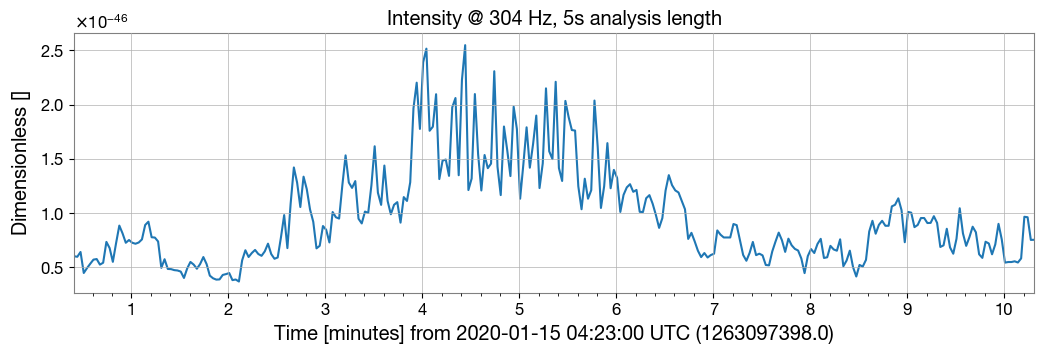

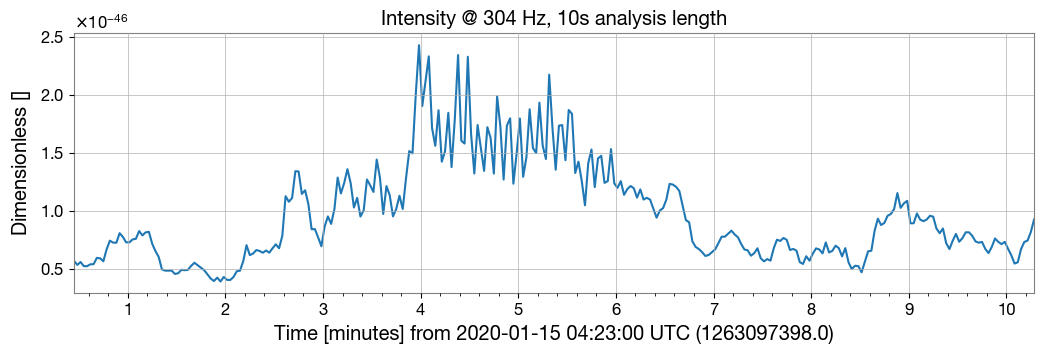

In [56]:
# Showing different analysis lengths

fss = freq_specific_time_series(hdata, min_time, 5, 2, max_time, 304, fftlength=1/16.)
plot = fss.plot()
ax = plot.gca()
ax.set_title('Intensity @ 304 Hz, 5s analysis length')
plot.show()

fss = freq_specific_time_series(hdata, min_time, 10, 2, max_time, 304, fftlength=1/16.)
plot = fss.plot()
ax = plot.gca()
ax.set_title('Intensity @ 304 Hz, 10s analysis length')
plot.show()

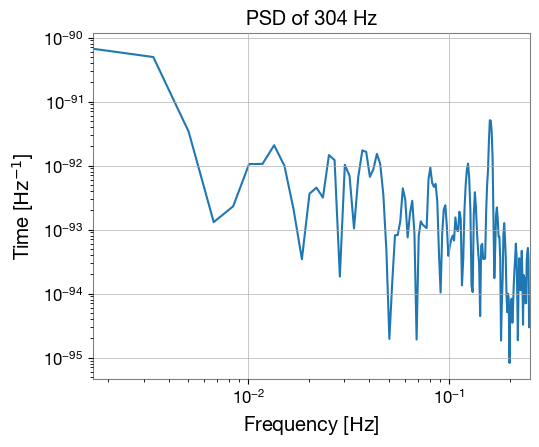

In [59]:
# Creating a psd of the fss
fss = freq_specific_time_series(hdata, min_time, 5, 2, max_time, 304, fftlength=1/16.)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 304 Hz')
plot.show()

### 320 Hz

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


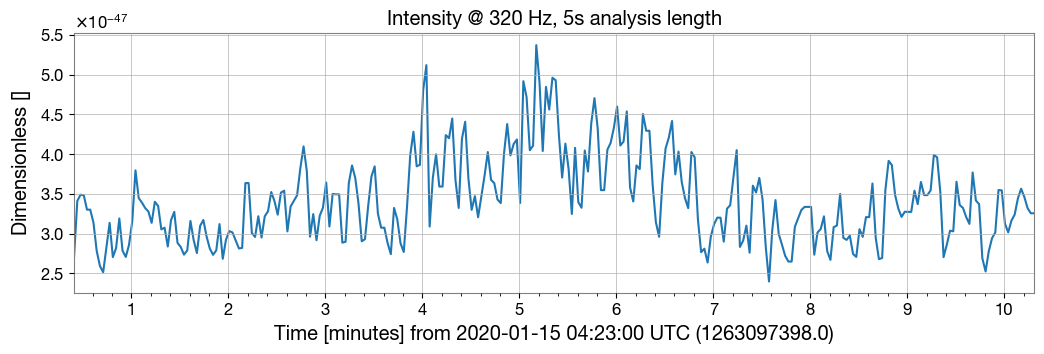

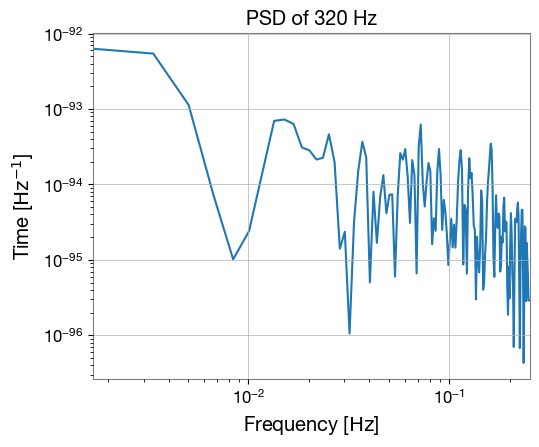

In [61]:
fss = freq_specific_time_series(hdata, min_time, 5, 2, max_time, 320, fftlength=1/16.)
plot = fss.plot()
ax = plot.gca()
ax.set_title('Intensity @ 320 Hz, 5s analysis length')
plot.show()

psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 320 Hz')
plot.show()

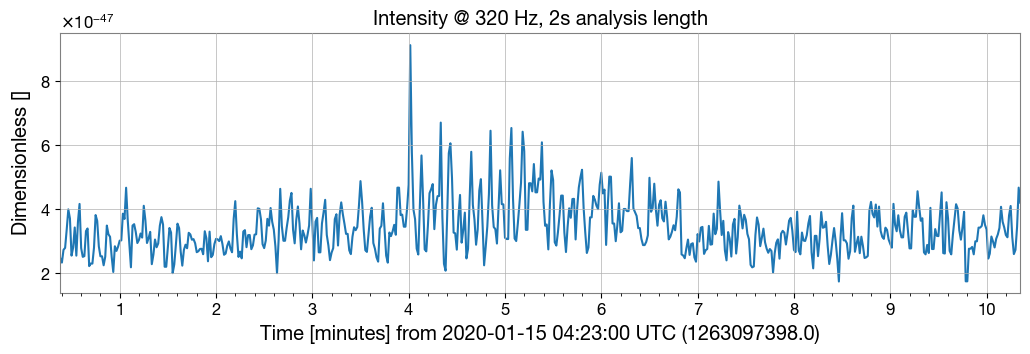

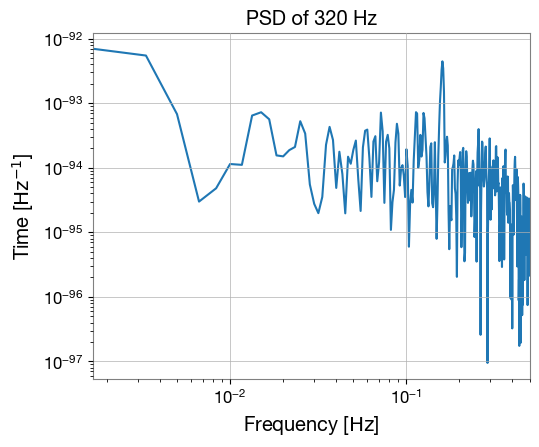

In [62]:
# Trying with shorter analysis length
fss = freq_specific_time_series(hdata, min_time, 2, 1, max_time, 320, fftlength=1/16.)
plot = fss.plot()
ax = plot.gca()
ax.set_title('Intensity @ 320 Hz, 2s analysis length')
plot.show()

psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 320 Hz')
plot.show()